# Socioeconomic prediction model Aragon (Spain)

### *by Lucas Murciano Galindo*

CSV Document with inmigration data from regions in Aragon is available at OpenData Aragon. 

Firstly Data is read and absence of NaN values is confirmed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
IC = pd.read_csv('Extranjeros por comarcas Aragón.csv')
IC.head()

,Año,Nacionalidad continente nombre,Nacionalidad área nombre,Nacionalidad país código,Nacionalidad país nombre,Residencia CCAA nombre,Residencia comarca nombre,Sexo,Personas
0,2019,Europa,UE-28,102,Austria,Aragón,Alto Gállego,Hombres,2
1,2019,Europa,UE-28,102,Austria,Aragón,La Ribagorza,Hombres,2
2,2019,Europa,UE-28,102,Austria,Aragón,La Ribagorza,Mujeres,1
3,2019,Europa,UE-28,102,Austria,Aragón,Cinco Villas,Hombres,1
4,2019,Europa,UE-28,102,Austria,Aragón,Somontano de Barbastro,Mujeres,1


In [4]:
IC.isna().any()

Año                               False
Nacionalidad continente nombre    False
Nacionalidad área nombre          False
Nacionalidad país código          False
Nacionalidad país nombre          False
Residencia CCAA nombre            False
Residencia comarca nombre         False
Sexo                              False
Personas                          False
dtype: bool

## 1. Exploratory Analysis: Main events on Inmigration

### 1.1 General Trend

In [5]:
Totals = pd.pivot_table(IC,values='Personas',index='Año',aggfunc=sum)
Totals=pd.DataFrame(Totals)

Text(0.5, 1.0, 'Total inmigrantes en Aragón por año')

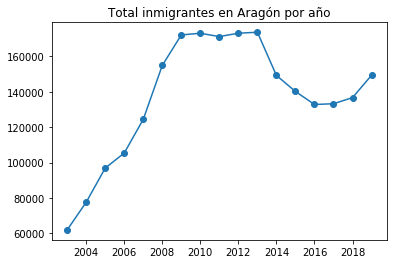

In [6]:
fig, ax = plt.subplots()
ax.plot(Totals,marker="o")
ax.set_title("Total inmigrantes en Aragón por año")

### 1.2 Trend by Origin Area

In [7]:
Areas = pd.pivot_table(IC,values='Personas',index='Año',columns='Nacionalidad continente nombre',aggfunc=sum)
Areas=pd.DataFrame(Areas)
Areas.head()

Nacionalidad continente nombre,América,Apátridas y no consta,Asia,Europa,Oceanía,África
Año,,,,,,
2003,22146,26,1717,20312,76,17619
2004,27057,31,2217,27549,62,20629
2005,30754,35,3013,37989,81,24976
2006,30619,26,3844,44789,62,26021
2007,32621,28,4010,60024,39,27682


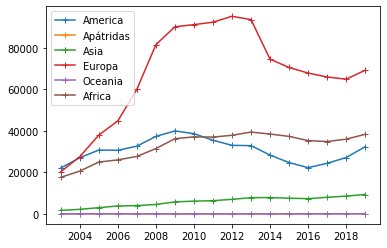

In [8]:
fig1, ax1 = plt.subplots()
ax1.plot(Areas,marker="+")
ax1.legend(['America','Apátridas','Asia','Europa','Oceania','Africa'])

As it can be seen in the graph, trend has different behaviour depending on the area of origin:

- Europe: High variation, strong growht before 2008. Constant lebel until 2014 and strong decrease until 2019
- America: Constant number, decreasing trend after 2010
- Africa: Constant number
- Asia: Constant increase with years

### 1.3 Distribution by Region

Data in 2019

In [9]:
Current = IC[IC['Año']==2019]
Current.head()

,Año,Nacionalidad continente nombre,Nacionalidad área nombre,Nacionalidad país código,Nacionalidad país nombre,Residencia CCAA nombre,Residencia comarca nombre,Sexo,Personas
0,2019,Europa,UE-28,102,Austria,Aragón,Alto Gállego,Hombres,2
1,2019,Europa,UE-28,102,Austria,Aragón,La Ribagorza,Hombres,2
2,2019,Europa,UE-28,102,Austria,Aragón,La Ribagorza,Mujeres,1
3,2019,Europa,UE-28,102,Austria,Aragón,Cinco Villas,Hombres,1
4,2019,Europa,UE-28,102,Austria,Aragón,Somontano de Barbastro,Mujeres,1


10 regions with least number of inmigrants

In [10]:
Com = pd.pivot_table(Current,values='Personas',index='Residencia comarca nombre',aggfunc=sum)
Com.sort_values(by='Personas',inplace=True)
Com.head(10)

,Personas
Residencia comarca nombre,
Sierra de Albarracín,257
Maestrazgo,294
Campo de Belchite,329
Aranda,532
Campo de Daroca,640
Ribera Baja del Ebro,646
Bajo Martín,673
Cuencas Mineras,700
Andorra-Sierra de Arcos,852


10 regions with most number of inmigrants

In [11]:
Com.sort_values(by='Personas',ascending=False, inplace=True)
Com.head(10)

,Personas
Residencia comarca nombre,
Central,81586
Valdejalón,6201
Hoya de Huesca / Plana de Uesca,5888
Comunidad de Calatayud,5474
Bajo Cinca / Baix Cinca,5131
Comunidad de Teruel,4107
Cinco Villas,3861
Bajo Aragón,3530
Bajo Aragón-Caspe / Baix Aragó-Casp,3453


**Distribution of Inmigrants by Region and Origin Country**

In [12]:
Dist_Com = pd.pivot_table(Current,values ='Personas',columns='Nacionalidad país nombre',index = 'Residencia comarca nombre',aggfunc=sum)
Dist_Com.fillna(value=0,inplace=True)
Dist_Com= Dist_Com.astype(int)
Dist_Com.head()

Nacionalidad país nombre,Albania,Alemania,Andorra,Angola,Apátridas,Arabia Saudí,Argelia,Argentina,Armenia,Australia,...,Turquía,Túnez,Ucrania,Uganda,Uruguay,Uzbekistán,Venezuela,Vietnam,Yemen,Zimbabwe
Residencia comarca nombre,,,,,,,,,,,,,,,,,,,,,
Alto Gállego,0,12,0,1,0,0,10,35,0,0,...,0,4,39,0,12,0,22,0,0,0
Andorra-Sierra de Arcos,0,0,0,0,0,0,0,12,0,0,...,0,0,0,0,5,0,7,0,0,0
Aranda,0,4,0,0,0,0,15,1,4,0,...,0,0,1,0,1,0,0,0,0,0
Bajo Aragón,0,7,2,0,8,0,58,23,0,0,...,1,2,30,0,15,0,11,0,0,0
Bajo Aragón-Caspe / Baix Aragó-Casp,0,26,0,0,0,0,31,2,0,0,...,2,3,11,0,0,0,4,0,0,0


Normalized

In [14]:
Com_Norm = Dist_Com.div(Dist_Com.sum(axis=1), axis=0)
Com_Norm.head()

Nacionalidad país nombre,Albania,Alemania,Andorra,Angola,Apátridas,Arabia Saudí,Argelia,Argentina,Armenia,Australia,...,Turquía,Túnez,Ucrania,Uganda,Uruguay,Uzbekistán,Venezuela,Vietnam,Yemen,Zimbabwe
Residencia comarca nombre,,,,,,,,,,,,,,,,,,,,,
Alto Gállego,0.0,0.008759,0.000000,0.00073,0.000000,0.0,0.007299,0.025547,0.000000,0.0,...,0.000000,0.002920,0.028467,0.0,0.008759,0.0,0.016058,0.0,0.0,0.0
Andorra-Sierra de Arcos,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.014085,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.005869,0.0,0.008216,0.0,0.0,0.0
Aranda,0.0,0.007519,0.000000,0.00000,0.000000,0.0,0.028195,0.001880,0.007519,0.0,...,0.000000,0.000000,0.001880,0.0,0.001880,0.0,0.000000,0.0,0.0,0.0
Bajo Aragón,0.0,0.001983,0.000567,0.00000,0.002266,0.0,0.016431,0.006516,0.000000,0.0,...,0.000283,0.000567,0.008499,0.0,0.004249,0.0,0.003116,0.0,0.0,0.0
Bajo Aragón-Caspe / Baix Aragó-Casp,0.0,0.007530,0.000000,0.00000,0.000000,0.0,0.008978,0.000579,0.000000,0.0,...,0.000579,0.000869,0.003186,0.0,0.000000,0.0,0.001158,0.0,0.0,0.0


**Most Common Countrys by Region**

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
import numpy as np

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Residencia comarca nombre']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Country'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Country'.format(ind+1))

# create a new dataframe
comarcas_sorted = pd.DataFrame(columns=columns)
comarcas_sorted['Residencia comarca nombre'] = Com_Norm.index

for ind in np.arange(Com_Norm.shape[0]):
    comarcas_sorted.iloc[ind, 1:] = return_most_common_venues(Com_Norm.iloc[ind, :], num_top_venues)

comarcas_sorted.head()

,Residencia comarca nombre,1st Most Common Country,2nd Most Common Country,3rd Most Common Country,4th Most Common Country,5th Most Common Country,6th Most Common Country,7th Most Common Country,8th Most Common Country,9th Most Common Country,10th Most Common Country
0,Alto Gállego,Rumanía,Marruecos,Portugal,Colombia,Ucrania,Argentina,Francia,Polonia,Italia,Nicaragua
1,Andorra-Sierra de Arcos,Marruecos,Rumanía,Polonia,Pakistán,Nicaragua,Argentina,Colombia,China,Chile,Francia
2,Aranda,Rumanía,Marruecos,Argelia,Brasil,Colombia,Italia,Bulgaria,Armenia,China,Alemania
3,Bajo Aragón,Rumanía,Marruecos,Polonia,Argelia,Pakistán,China,Colombia,Italia,Ucrania,Bulgaria
4,Bajo Aragón-Caspe / Baix Aragó-Casp,Marruecos,Pakistán,Rumanía,Reino Unido,Polonia,Senegal,Países Bajos,Bulgaria,Gambia,República Checa


### 1.4 Clustering

In [19]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [21]:
# We set initial number of clusters = 4
kclusters = 4
comarcas_clustering = Com_Norm

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comarcas_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 0, 0, 1, 2, 1, 3, 0, 0], dtype=int32)

**Elbow Method**

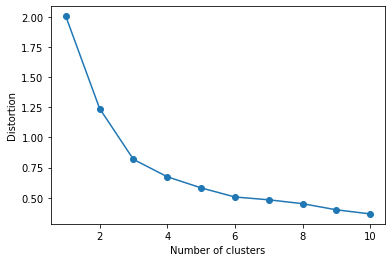

In [22]:
import matplotlib.pyplot as plt
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(comarcas_clustering)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Optimum k=4** in introduced in KMeans calculation above

In [23]:
# add clustering labels
comarcas_sorted.insert(1, 'Cluster Labels', kmeans.labels_)
comarcas_sorted.head()

,Residencia comarca nombre,Cluster Labels,1st Most Common Country,2nd Most Common Country,3rd Most Common Country,4th Most Common Country,5th Most Common Country,6th Most Common Country,7th Most Common Country,8th Most Common Country,9th Most Common Country,10th Most Common Country
0,Alto Gállego,3,Rumanía,Marruecos,Portugal,Colombia,Ucrania,Argentina,Francia,Polonia,Italia,Nicaragua
1,Andorra-Sierra de Arcos,3,Marruecos,Rumanía,Polonia,Pakistán,Nicaragua,Argentina,Colombia,China,Chile,Francia
2,Aranda,0,Rumanía,Marruecos,Argelia,Brasil,Colombia,Italia,Bulgaria,Armenia,China,Alemania
3,Bajo Aragón,0,Rumanía,Marruecos,Polonia,Argelia,Pakistán,China,Colombia,Italia,Ucrania,Bulgaria
4,Bajo Aragón-Caspe / Baix Aragó-Casp,1,Marruecos,Pakistán,Rumanía,Reino Unido,Polonia,Senegal,Países Bajos,Bulgaria,Gambia,República Checa


**Clusters Insights**

Cluster 0

In [25]:
Com_0 = comarcas_sorted.loc[comarcas_sorted['Cluster Labels']==0]
Com_0['1st Most Common Country'].value_counts()

Rumanía    11
Name: 1st Most Common Country, dtype: int64

Cluster 1

In [26]:
Com_1 = comarcas_sorted.loc[comarcas_sorted['Cluster Labels']==1]
Com_1['1st Most Common Country'].value_counts()

Marruecos    6
Name: 1st Most Common Country, dtype: int64

Cluster 2

In [27]:
Com_2 = comarcas_sorted.loc[comarcas_sorted['Cluster Labels']==2]
Com_2['1st Most Common Country'].value_counts()

Rumanía      6
Marruecos    1
Bulgaria     1
Name: 1st Most Common Country, dtype: int64

Cluster 3

In [28]:
Com_3 = comarcas_sorted.loc[comarcas_sorted['Cluster Labels']==3]
Com_3['1st Most Common Country'].value_counts()

Rumanía      7
Marruecos    1
Name: 1st Most Common Country, dtype: int64

## 2.Exploratory Analysis: Main Events on Job Market